In [1]:
import numpy as np
import xarray as xr
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large'})
sns.set_palette('colorblind')

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
prefix = '50-18_'
raw_data = xr.open_dataset('data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')
raw_data.coords['mn'] = raw_data.coords['mn'].astype('<U8')

thermo = xr.open_dataset('data/{}thermo_data.nc'.format(prefix))['THERMO']
# For some reason the data-type isn't preserved and loads back as '|S8'
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
thermo.coords['mn'] = thermo.coords['mn'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)


<IPython.core.display.Javascript object>


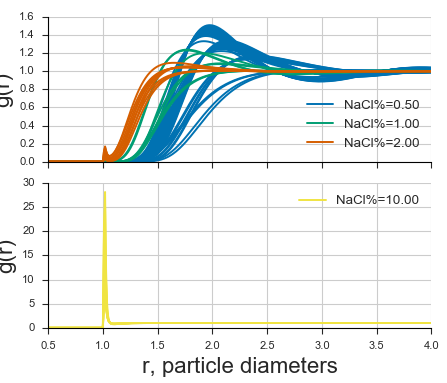

In [31]:
nacls = [x.item() for x in raw_data.coords['NaCl']]
sio2s = [x.item() for x in raw_data.coords['SiO2']]
colors = dict(zip(nacls, sns.color_palette(n_colors=len(nacls))))
shapes = dict(zip(sio2s, ['o', 'x', 'D', 'v', '^']))

f, (ax1, ax2) = plt.subplots(2, sharex=True)
labeled = set()
for nacl, sio2, eps in it.product(raw_data.coords['NaCl'], raw_data.coords['SiO2'], raw_data.coords['epsilon']):
    g_r = raw_data.sel(epsilon=eps, SiO2=sio2, NaCl=nacl, data='g_r', mn='100-50')
    if np.isnan(g_r[10]):
        continue
    if nacl.item() > 3:
        ax = ax2
    else:
        ax = ax1
#     if (nacl.item(), sio2.item()) in labeled:
    if nacl.item() in labeled:
        lab = ''
    else:
        lab = 'NaCl%={:.2f}'.format(nacl.item())
#         lab = 'NaCl%={:.2f} SiO2 {:.2f}'.format(nacl.item(), sio2.item())
        labeled.add(nacl.item())
#         labeled.add((nacl.item(), sio2.item()))
    ax.plot(r, g_r, 
            color=colors[nacl.item()],
#             marker=shapes[sio2.item()],
#             ms = 5,
            label=lab)
ax1.set_xlim(0.5, 4)
ax1.set_ylim(0)
ax2.set_xlim(0.5, 4)
ax2.set_ylim(0)
ax1.legend(loc='lower right', fontsize=12)
ax2.legend(fontsize=12)

ax2.set_xlabel('r, particle diameters', fontsize=20)
ax2.set_ylabel('g(r)', fontsize=20)
ax1.set_ylabel('g(r)', fontsize=20)

plt.tight_layout()
sns.despine()
f.savefig('salt_g_r.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


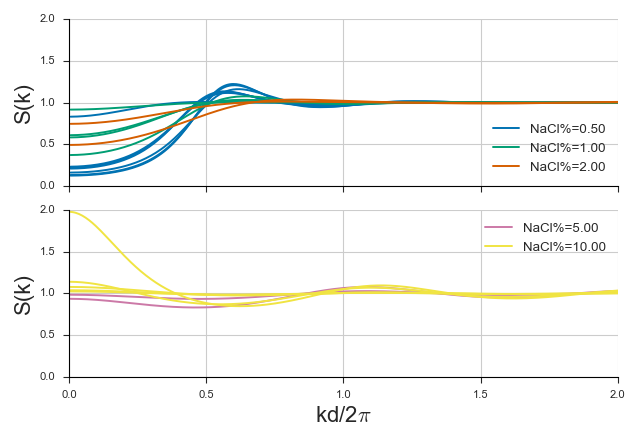

In [6]:
nacls = [x.item() for x in raw_data.coords['NaCl']]
sio2s = [x.item() for x in raw_data.coords['SiO2']]
colors = dict(zip(nacls, sns.color_palette(n_colors=len(nacls))))
shapes = dict(zip(sio2s, ['o', 'x', 'D', 'v', '^']))

f, (ax1, ax2) = plt.subplots(2, sharex=True)
labeled = set()
for nacl, sio2, eps in it.product(raw_data.coords['NaCl'], raw_data.coords['SiO2'], raw_data.coords['epsilon']):
    s_k = raw_data.sel(epsilon=eps, SiO2=sio2, NaCl=nacl, data='S_k', mn='50-18')
    if np.isnan(s_k[10]):
        continue
    if nacl.item() < 3:
        ax = ax1
    else:
        ax = ax2
#     if nacl.item() in labeled:
    if nacl.item() in labeled:
        lab = ''
    else:
        lab = 'NaCl%={:.2f}'.format(nacl.item())
#         lab = 'NaCl%={:.2f} SiO2 {:.2f}'.format(nacl.item(), sio2.item())
        labeled.add(nacl.item())
#         labeled.add((nacl.item(), sio2.item()))
#     lab = 'NaCl%={:.2f} SiO2 {:.2f} eps {:.2f}'.format(nacl.item(), sio2.item(), eps.item())
    ax.plot(k/(2*np.pi), s_k, 
            color=colors[nacl.item()],
#             marker=shapes[sio2.item()],
#             ms = 5,
#             markevery=25,
#             markeredgecolor='k',
            label=lab)
ax1.set_xlim(0, 2)
ax1.set_ylim(0, 2)
ax2.set_xlim(0, 2)
ax2.set_ylim(0, 2)
ax1.legend(loc='lower right', fontsize=12)
ax2.legend(fontsize=12)

ax2.set_xlabel(r'kd/2$\pi$', fontsize=20)
ax2.set_ylabel('S(k)', fontsize=20)
ax1.set_ylabel('S(k)', fontsize=20)

# ax1.set_xscale('log')
# ax2.set_xscale('log')
# ax1.axvline(1, color='k', ls='--')
# ax2.axvline(1, color='k', ls='--')

plt.tight_layout()
sns.despine()
f.savefig('salt_s_k.pdf', bbox_inches='tight')

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


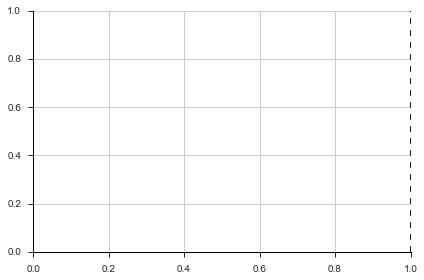

In [13]:
nacls = [x.item() for x in raw_data.coords['NaCl']]
sio2s = [x.item() for x in raw_data.coords['SiO2']]
colors = dict(zip(nacls, sns.color_palette(n_colors=len(nacls))))
shapes = dict(zip(sio2s, ['o', 'x', 'D', 'v', '^']))

s_k = raw_data.sel(SiO2=10, data='S_k', mn='100-50')


ax1.set_ylim(0)
ax1.legend(loc='lower right', fontsize=12)


ax.set_xlabel(r'k', fontsize=20)
ax.set_ylabel('S(k)', fontsize=20)

# ax1.set_xscale('log')
# ax2.set_xscale('log')
ax1.axvline(1, color='k', ls='--')
# ax2.axvline(1, color='k', ls='--')

plt.tight_layout()
sns.despine()
f.savefig('salt_s_k.pdf', bbox_inches='tight')

In [28]:
s_k = raw_data.sel(NaCl=10, data='S_k', mn='100-50')

<xarray.DataArray 'RAW' (epsilon: 15, r: 8191)>
[122865 values with dtype=float64]
Coordinates:
    NaCl     float64 10.0
    SiO2     int32 1
  * r        (r) float64 0.01 0.02 0.03 0.04 0.05 0.05999 0.06999 0.07999 ...
    data     <U3 'S_k'
    mn       <U6 '100-50'
  * epsilon  (epsilon) float64 3.0 3.2 3.4 3.6 3.8 4.0 4.2 4.4 4.6 4.8 5.0 ...
<xarray.DataArray 'RAW' (epsilon: 15, r: 8191)>
[122865 values with dtype=float64]
Coordinates:
    NaCl     float64 10.0
    SiO2     int32 6
  * r        (r) float64 0.01 0.02 0.03 0.04 0.05 0.05999 0.06999 0.07999 ...
    data     <U3 'S_k'
    mn       <U6 '100-50'
  * epsilon  (epsilon) float64 3.0 3.2 3.4 3.6 3.8 4.0 4.2 4.4 4.6 4.8 5.0 ...
<xarray.DataArray 'RAW' (epsilon: 15, r: 8191)>
[122865 values with dtype=float64]
Coordinates:
    NaCl     float64 10.0
    SiO2     int32 11
  * r        (r) float64 0.01 0.02 0.03 0.04 0.05 0.05999 0.06999 0.07999 ...
    data     <U3 'S_k'
    mn       <U6 '100-50'
  * epsilon  (epsilon) float64 